In [5]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

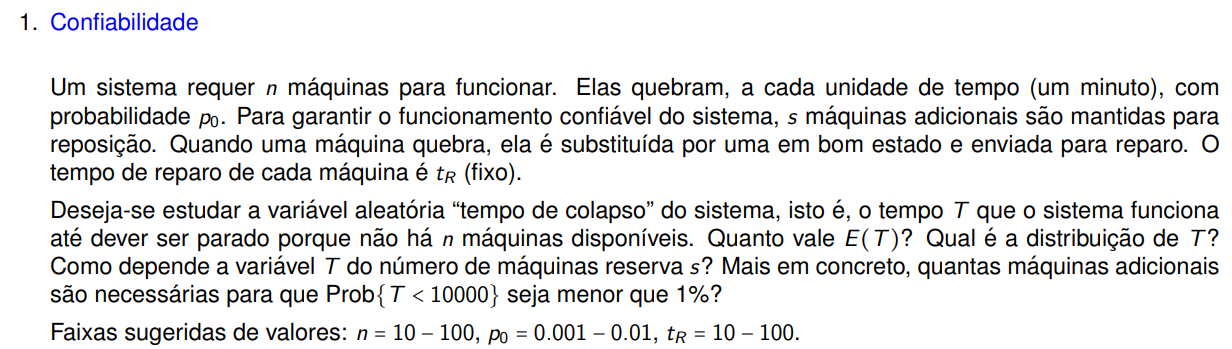

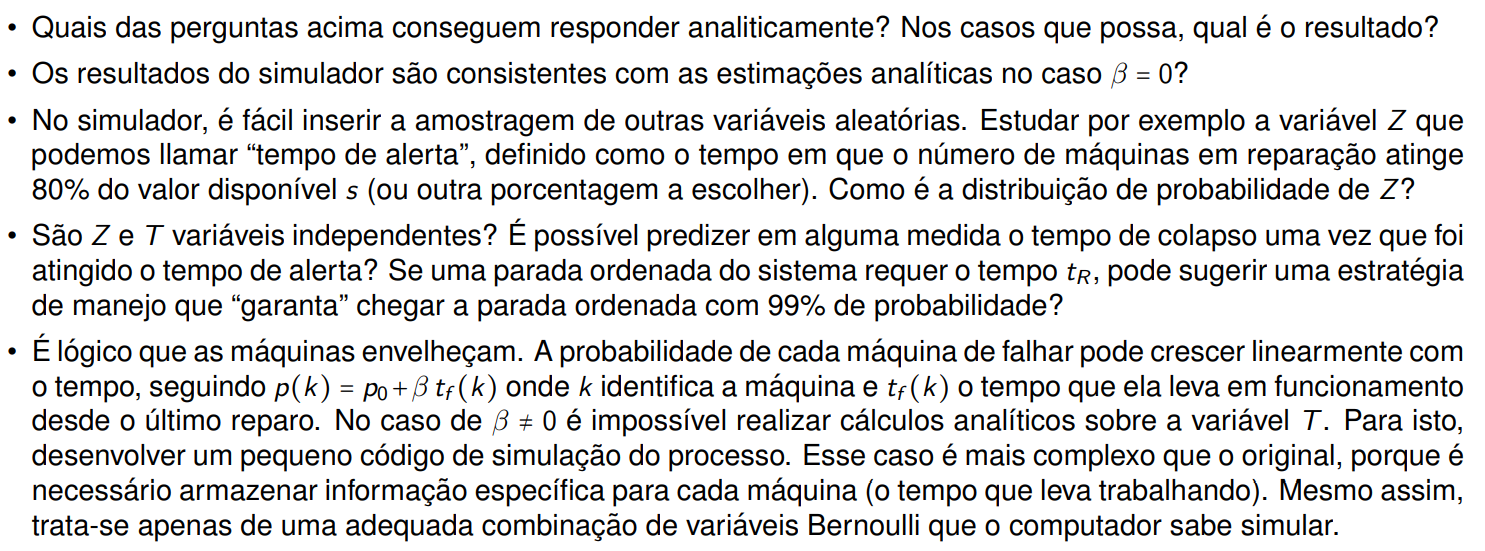

* Quais das perguntas acima conseguem responder analiticamente? Nos casos que possa, qual o resultado?

    A distribuição de T é binômial dado que analisa-se cada valor do T e não um intervalo de T. A variável T depende não só de s, mas como do número de máquinas, da probabilidade de falha e do tempo de reparo.

*  No simulador, e fácil inserir a amostragem de outras variáveis aleatórias. Estudar por exemplo a variável Z que
podemos llamar “tempo de alerta”, definido como o tempo em que o numero de máquinas em reparação atinge
80% do valor disponível s (ou outra porcentagem a escolher). Como é a distribuição de probabilidade de Z?

    A distribuição de probabilidade de Z é binômial também, visto que funciona como se fosse a variável T, mas é coletada no tempo de alerta.

Ideia da simulação é variar os valores de n (entre 10-100), pf (0.001 - 0.01), tr (10-100), s, nesse caso, a quantidade é uma porcentagem que varia do n

In [6]:
n_list  = [10, 25, 50, 75, 100]
pf_list = [0.001, 0.0025, 0.005, 0.0075, 0.01]
tr_list = [10, 25, 50, 75, 100]
s_list  = [0.10, 0.20, 0.25, 0.5]

In [126]:
class Queue():
  def __init__(self):
    self.machines_list = []
    self.machines_at_repair = 0

  def get_amt_machines(self):
    return self.machines_at_repair

  def get(self):
    return self.machines_list[0][0]

  def insert(self, entry_time, machines_amount):
      self.machines_list.append((entry_time, machines_amount))
      self.machines_at_repair+=machines_amount

  def pop(self):
      self.machines_at_repair -= self.machines_list[0][1]
      return self.machines_list.pop(0)

  def is_empty(self):
    return bool(self.machines_list)

In [46]:
def simulacao(n, pf, tr, s):
  t = 0
  # Numero de maquinas reservas
  reserve = int(n*s)
  # Fila de maquinas quebradas
  queue = Queue()

  while n > 0:
    bm = np.random.binomial(n, pf, 1)

    queue.insert(t, bm)
    
    if(reserve >= bm):
      reserve -= bm
    else:
      n -= bm - reserve
      reserve = 0

    if not queue.is_empty() and queue.get() + tr == t:
      reserve += queue.pop()[1]

    t += 1

  return t

In [9]:
def write_data(times, n):
  with open(f"data_{n}.csv", "w+") as fptr:
    fptr.write("numero de maquinas,prob. de falha,tempo de reparo,maquinas suplentes,tempo obtido\n")
    for i in times.items():
      chave = str(i[0])
      valor = str(np.mean(i[1]))
      fptr.write(chave+','+valor+'\n')

####################################################################################################################################################################

In [47]:
n = 100
times = {}
for pf in pf_list:
    for tr in tr_list:
        for s in s_list:
            times[f'{n},{pf},{tr},{s}'] = []
            for i in range(10):
                times[f'{n},{pf},{tr},{s}'].append(simulacao(n,pf,tr,s))
            
write_data(times, n)

In [127]:
def simulacao_com_z(n,pf,tr,s):
  t = 0
  # Numero de maquinas reservas
  reserve = int(n*s)
  total_reserve = reserve
  time_80_percent = 0
  # Fila de maquinas quebradas
  queue = Queue()

  while n > 0:
    bm = np.random.binomial(n, pf, 1)

    queue.insert(t, bm)
    
    if(reserve >= bm):
      reserve -= bm
    else:
      n -= bm - reserve
      reserve = 0

    if not queue.is_empty() and queue.get() + tr == t:
      reserve += queue.pop()[1]

    if queue.get_amt_machines() >= 0.8*total_reserve:
        time_80_percent = t
    t += 1

  return (t, time_80_percent)

In [121]:
def write_data_z(times, n):
  with open(f"data_{n}_z.csv", "w+") as fptr:
    fptr.write("numero de maquinas,prob. de falha,tempo de reparo,maquinas suplentes,tempo obtido, tempo de alerta\n")
    for i in times.items():
    #   chave = str(i[0])
    #   valor = str(np.mean(i[1]))
    #   fptr.write(chave+','+valor+'\n')
        print(i)

In [128]:
n = 10
times_with_z = {}
for pf in pf_list:
    for tr in tr_list:
        for s in s_list:
            times_with_z[f'{n},{pf},{tr},{s}'] = []
            for i in range(10):
                times_with_z[f'{n},{pf},{tr},{s}'].append(simulacao_com_z(n,pf,tr,s))
                

write_data_z(times_with_z, n)

('10,0.001,10,0.1', [(3397, 3396), (5218, 5217), (3454, 3453), (1460, 1459), (3993, 3992), (2568, 2567), (2422, 2421), (2659, 2658), (2006, 2005), (4326, 4325)])
('10,0.001,10,0.2', [(4154, 4153), (1934, 1933), (2018, 2017), (1696, 1695), (1724, 1723), (2313, 2312), (2166, 2165), (2036, 2035), (2457, 2456), (3862, 3861)])
('10,0.001,10,0.25', [(3819, 3818), (2117, 2116), (4171, 4170), (3068, 3067), (3110, 3109), (4747, 4746), (3086, 3085), (2297, 2296), (5368, 5367), (5848, 5847)])
('10,0.001,10,0.5', [(2871, 2870), (2103, 2102), (3663, 3662), (6225, 6224), (4020, 4019), (2900, 2899), (3110, 3109), (2688, 2687), (3584, 3583), (5794, 5793)])
('10,0.001,25,0.1', [(2435, 2434), (9483, 9482), (1811, 1810), (1659, 1658), (2400, 2399), (2024, 2023), (3183, 3182), (2260, 2259), (2103, 2102), (1689, 1688)])
('10,0.001,25,0.2', [(1528, 1527), (2434, 2433), (1750, 1749), (2242, 2241), (3428, 3427), (1651, 1650), (1196, 1195), (3402, 3401), (1759, 1758), (2975, 2974)])
('10,0.001,25,0.25', [(2951

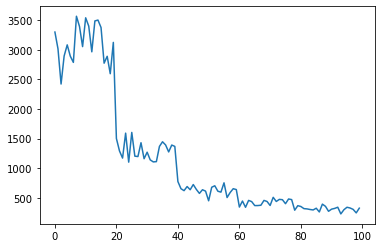

In [77]:

df_10 = pd.read_csv("data_10.csv")

df_10["tempo obtido"].plot()
plt.show()

In [102]:
def simulacao1(n, pf, tr, s):
  t = 0
  # Numero de maquinas reservas
  reserve = int(n*s)
  # Fila de maquinas quebradas
  queue = Queue()

  while n > 0:
    bm = np.random.binomial(n, pf, 1)

    queue.insert(t, bm)
    
    if(reserve >= bm):
      reserve -= bm
    else:
      n -= bm - reserve
      reserve = 0

    if not queue.is_empty() and queue.get() + tr == t:
      reserve += queue.pop()[1]

    t += 1
  
  if(t > 10000):
    return (t,1)
  else:
    return (t,0)

coluna = ["Reservas(%)","Tempo", "> 10.000?"]
data = np.zeros((1,len(coluna)))
df = pd.DataFrame(data, columns = coluna)
print(df)

h = 0
for t in range(0,7):
  s_s1 = [float(f'{t}.{i}') for i in range(1,10)]
  nova_linha = []
  for i in s_s1:
    df.loc[h] = [i, simulacao1(100,0.001,10,i)[0], simulacao1(100,0.001,10,i)[1]]
    h+=1

   Reservas(%)  Tempo  > 10.000?
0          0.0    0.0        0.0


,Reservas(%),Tempo,> 10.000?
0,0.1,3031.0,0.0
1,0.2,6156.0,0.0
2,0.3,6321.0,0.0
3,0.4,5206.0,0.0
4,0.5,4186.0,0.0
...,...,...,...
58,6.5,10166.0,1.0
59,6.6,10645.0,1.0
60,6.7,12555.0,1.0
61,6.8,13813.0,1.0


**Mais em concreto, quantas máquinas adicionais são necessárias para que Prob{T < 10000} seja menor que 1%?**

13585.460000000001


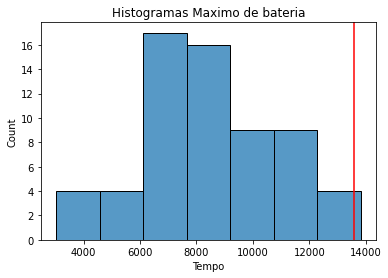

In [113]:
#dowjones = sb.load_dataset("df")
#sns.relplot(data=dowjones, x="Date", y="Price", kind="line")